In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Target Data **

In [ ]:
submission = pd.read_csv('SampleSubmission.csv')
submission

,id,target
0,17,relationship-and-family-issues
1,50,relationship-and-family-issues
2,55,relationship-and-family-issues
3,68,relationship-and-family-issues
4,72,relationship-and-family-issues
...,...,...
2457,24562,relationship-and-family-issues
2458,24564,relationship-and-family-issues
2459,24566,relationship-and-family-issues
2460,24587,relationship-and-family-issues


# Data Preprocessing

In [ ]:
df = pd.read_csv('train.csv')
df

,id,title,content,target
0,11098,Getting of the weed,"[Post removed at request of member]\nHi, welco...",suicidal-thoughts-and-self-harm
1,116,Seeking advice on how to face a hospital stay,"Hi NMTB,\nThanks for your post. \nI think a lo...",anxiety
2,7189,Trying to re-enter the work place,"Hello, \nI’m Cas and for a fair while now I ha...",anxiety
3,4350,Family history of cancer,Hey everyone.\nI've just discovered that anoth...,anxiety
4,9749,Inappropriate relationship with therapist.,Hi everyone\nI guess the title says it all rea...,depression
...,...,...,...,...
22146,19319,Hurting and Alone,I've recently had a miscarriage and didn't eve...,relationship-and-family-issues
22147,18676,Ground collapsing beneath my feet,"Gods, I wonder sometimes what I did in this li...",depression
22148,6757,New member,Firstly hello to all and thankyou for the oppo...,anxiety
22149,6790,Domestic Violence court hearings,SO I left my home 05.02 and moved away and he ...,ptsd-and-trauma


In [ ]:
df.describe()

,id
count,22151.000000
mean,12282.261297
std,7102.200539
min,0.000000
25%,6134.500000
50%,12268.000000
75%,18429.500000
max,24612.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22151 entries, 0 to 22150
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       22151 non-null  int64 
 1   title    22151 non-null  object
 2   content  21909 non-null  object
 3   target   22151 non-null  object
dtypes: int64(1), object(3)
memory usage: 692.3+ KB


In [ ]:
df.dtypes

,0
id,int64
title,object
content,object
target,object


In [ ]:
df.shape

(22151, 4)

<ipython-input-13-592538e3f08c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


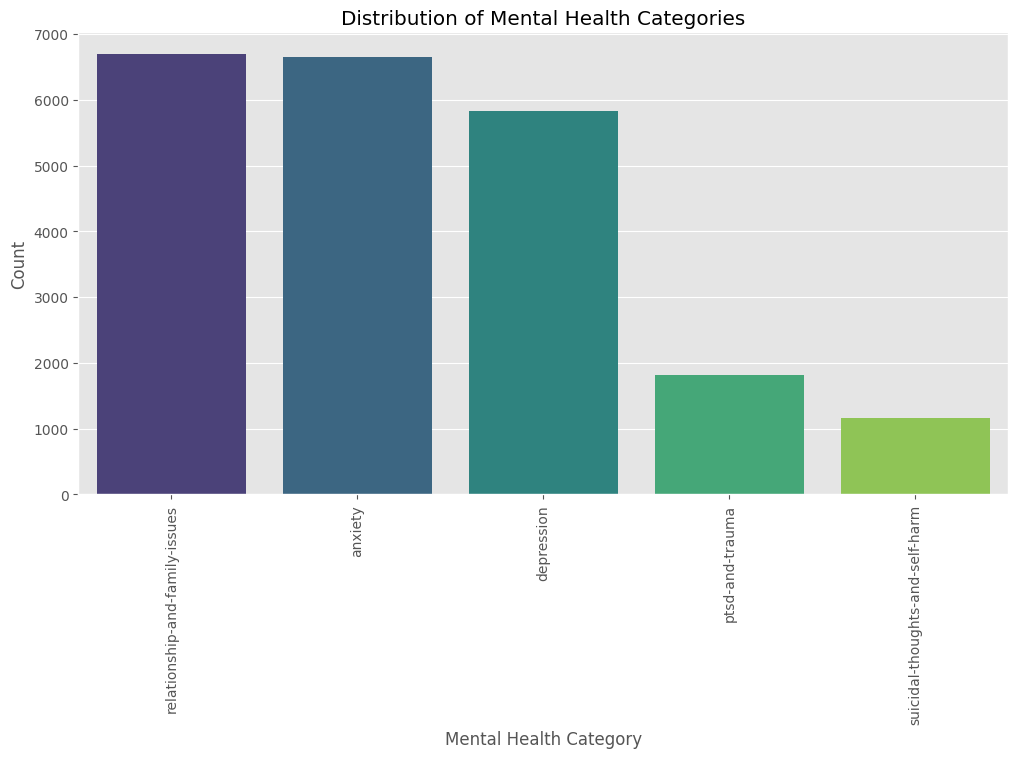

In [ ]:
# Set plot style
plt.style.use("ggplot")

# Count the target categories
target_counts = df["target"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Mental Health Category")
plt.ylabel("Count")
plt.title("Distribution of Mental Health Categories")
plt.show()

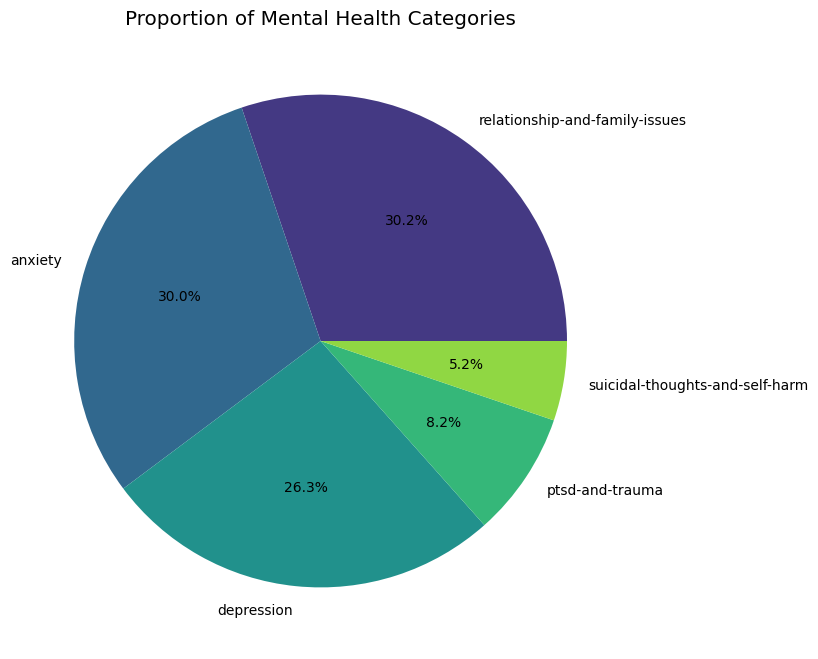

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(target_counts.values, labels=target_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(target_counts)))
plt.title("Proportion of Mental Health Categories")
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
id,0
title,0
content,242
target,0


In [ ]:
df = df.dropna(subset=["content"])
df.isnull().sum()

,0
id,0
title,0
content,0
target,0


In [ ]:
# Function to calculate the number of outliers in each feature
def count_outliers(data):
    outliers = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)  # First quartile
        Q3 = data[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1                     # Interquartile range

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

    return outliers

# Detect outliers in the dataset
outlier_counts = count_outliers(df)

# Display the number of outliers for each feature
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")


id: 0 outliers


Removing extra characters :

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):  # Ensure the input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
        text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
        text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply to 'title' and 'content' columns
df["title"] = df["title"].apply(clean_text)
df["content"] = df["content"].apply(clean_text)

<ipython-input-19-b7ad65bdc8fe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title"] = df["title"].apply(clean_text)
<ipython-input-19-b7ad65bdc8fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content"] = df["content"].apply(clean_text)


Removing StopWords

In [ ]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df["content"] = df["content"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-20-37e8804d9215>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content"] = df["content"].apply(remove_stopwords)


In [ ]:
df["title"] = df["title"].str.lower()
df["content"] = df["content"].str.lower()

<ipython-input-21-b23d749b2a2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title"] = df["title"].str.lower()
<ipython-input-21-b23d749b2a2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content"] = df["content"].str.lower()


Tokenization

In [ ]:
import nltk

# Download the necessary data
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

df["title_tokens"] = df["title"].apply(word_tokenize)
df["content_tokens"] = df["content"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-22-d4d082780e21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title_tokens"] = df["title"].apply(word_tokenize)
<ipython-input-22-d4d082780e21>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_tokens"] = df["content"].apply(word_tokenize)


Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["content"].fillna(""))  # Convert to sparse matrix

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df["content"].fillna(""))  # Convert to sparse matrix

Preparing Dataset for Fine-Tuning

In [ ]:
import torch
from transformers import RobertaTokenizer
from sklearn.model_selection import train_test_split

# Load tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Combine title and content for richer input
df["text"] = df["title"].fillna("") + " " + df["content"].fillna("")

# Encode text data
encodings = tokenizer(df["text"].tolist(), truncation=True, padding=True, max_length=512, return_tensors="pt")

# Convert target labels to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["target_encoded"] = label_encoder.fit_transform(df["target"])

# Convert to PyTorch tensors
input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
labels = torch.tensor(df["target_encoded"].values)

# Split into train and validation sets
X_train, X_val, mask_train, mask_val, y_train, y_val = train_test_split(
    input_ids, attention_mask, labels, test_size=0.2, random_state=42, stratify=labels
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

<ipython-input-25-6df814d2bec6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["title"].fillna("") + " " + df["content"].fillna("")
<ipython-input-25-6df814d2bec6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target_encoded"] = label_encoder.fit_transform(df["target"])


Fine-Tune RoBERTa

In [ ]:
from google.colab import drive
import os
import torch
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

# Mount Google Drive
drive.mount('/content/drive')

# Define checkpoint directory in Drive
CHECKPOINT_DIR = "/content/drive/MyDrive/roberta_checkpoints"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Detect device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Adjust batch size based on available device
batch_size = 8 if device == "cuda" else 2  # Higher batch size for GPU, lower for CPU

# Define dataset format
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],  # Correct indexing for 'input_ids'
            "attention_mask": self.attention_mask[idx],  # Correct indexing for 'attention_mask'
            "labels": self.labels[idx]
        }

# Create datasets (make sure X_train, X_val, mask_train, mask_val, y_train, y_val are correctly defined)
train_dataset = TextDataset(X_train, mask_train, y_train)
val_dataset = TextDataset(X_val, mask_val, y_val)

# Load RoBERTa with classification head (use checkpoint if available)
num_classes = len(df["target"].unique())  # Get number of unique classes in your target
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_classes)

# Define training arguments
training_args = TrainingArguments(
    output_dir=CHECKPOINT_DIR,   # Save model checkpoints to Drive
    evaluation_strategy="epoch",
    save_strategy="epoch",       # Save model after each epoch
    save_total_limit=2,          # Keep only the last 2 checkpoints to save space
    per_device_train_batch_size=batch_size,  # Use dynamic batch size
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir=CHECKPOINT_DIR + "/logs",  # Log directory in Drive
    logging_steps=10,
    load_best_model_at_end=True
)

# Find latest checkpoint if available
checkpoint = None
if os.path.exists(CHECKPOINT_DIR):
    checkpoints = [ckpt for ckpt in os.listdir(CHECKPOINT_DIR) if ckpt.startswith("checkpoint-")]
    if checkpoints:
        checkpoints.sort(key=lambda x: int(x.split("-")[-1]))  # Sort numerically
        checkpoint = os.path.join(CHECKPOINT_DIR, checkpoints[-1])  # Load latest checkpoint
        print(f"Resuming training from checkpoint: {checkpoint}")
    else:
        print("No checkpoint found, training from scratch.")

# Load model (use checkpoint if available)
model = RobertaForSequenceClassification.from_pretrained(
    checkpoint if checkpoint else "roberta-base",
    num_labels=num_classes
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start/resume training
trainer.train(resume_from_checkpoint=checkpoint)


Mounted at /content/drive
Using device: cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


No checkpoint found, training from scratch.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bedoui-khalil (bedoui-khalil-esprit-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,1.389700,1.443322
2,1.524900,1.435365
3,1.445200,1.433744


TrainOutput(global_step=6573, training_loss=1.4425384791931495, metrics={'train_runtime': 6122.1725, 'train_samples_per_second': 8.589, 'train_steps_per_second': 1.074, 'total_flos': 1.3835015048899584e+16, 'train_loss': 1.4425384791931495, 'epoch': 3.0})

In [ ]:
from google.colab import drive
import os
import torch
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments, RobertaTokenizer

# Mount Google Drive
drive.mount('/content/drive')

# Define checkpoint directory in Drive
CHECKPOINT_DIR = "/content/drive/MyDrive/roberta_checkpoints"

# Detect device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda


In [ ]:
from google.colab import drive
import os
import torch
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

# Mount Google Drive
drive.mount('/content/drive')

# Define checkpoint directory in Drive
CHECKPOINT_DIR = "/content/drive/MyDrive/roberta_checkpoints"

# Detect device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Adjust batch size based on available device
batch_size = 8 if device == "cuda" else 2  # Higher batch size for GPU, lower for CPU

# Define dataset format
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx]
        }

# Create datasets (make sure X_train, X_val, mask_train, mask_val, y_train, y_val are defined)
val_dataset = TextDataset(X_val, mask_val, y_val)

# Load RoBERTa with classification head (use checkpoint if available)
num_classes = len(df["target"].unique())  # Get number of unique classes in your target
checkpoint = "/content/drive/MyDrive/roberta_checkpoints/checkpoint-6573"  # Set checkpoint path

# Load the fine-tuned model from checkpoint
model = RobertaForSequenceClassification.from_pretrained(checkpoint, num_labels=num_classes)
model.to(device)  # Ensure the model is moved to the correct device

# Define training arguments (for evaluation only)
training_args = TrainingArguments(
    output_dir=CHECKPOINT_DIR,
    per_device_eval_batch_size=batch_size,
    no_cuda=(device == "cpu"),  # Don't use CUDA if running on CPU
    logging_dir=CHECKPOINT_DIR + "/logs",  # Log directory
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset
)

# Make predictions
preds = trainer.predict(val_dataset)

# Get predictions
y_pred = torch.argmax(torch.tensor(preds.predictions), dim=1).numpy()

# Compute accuracy
accuracy = accuracy_score(y_val.numpy(), y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda


Validation Accuracy: 0.3008


In [ ]:
from transformers import Trainer, TrainingArguments, RobertaForSequenceClassification, RobertaTokenizer

# Define checkpoint directory
CHECKPOINT_DIR = "/content/drive/MyDrive/roberta_checkpoints"

# Find latest checkpoint
checkpoints = [ckpt for ckpt in os.listdir(CHECKPOINT_DIR) if ckpt.startswith("checkpoint-")]
if checkpoints:
    checkpoints.sort(key=lambda x: int(x.split("-")[-1]))  # Sort numerically
    latest_checkpoint = os.path.join(CHECKPOINT_DIR, checkpoints[-1])  # Load latest checkpoint
    print(f"Loading model from checkpoint: {latest_checkpoint}")
else:
    raise ValueError("No checkpoint found in the directory!")

# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained(latest_checkpoint)
model.eval()  # Set model to evaluation mode

# Load and tokenize test data
test_df = pd.read_csv("test.csv")
test_df["text"] = test_df["title"].fillna("") + " " + test_df["content"].fillna("")
test_encodings = tokenizer(
    test_df["text"].tolist(),
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors="pt"
)

# Define dataset class (without labels for inference)
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, attention_mask):
        self.input_ids = input_ids
        self.attention_mask = attention_mask

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
        }

# Create test dataset
test_dataset = TextDataset(test_encodings["input_ids"], test_encodings["attention_mask"])

# Define dummy TrainingArguments (required by Trainer)
training_args = TrainingArguments(
    output_dir=CHECKPOINT_DIR,
    per_device_eval_batch_size=8  # Adjust based on GPU availability
)

# Recreate trainer for inference
trainer = Trainer(
    model=model,
    args=training_args
)

# Get predictions
test_preds = trainer.predict(test_dataset)

# Convert logits to predicted class labels
test_labels = torch.argmax(torch.tensor(test_preds.predictions), dim=1).numpy()

# Convert numeric labels to original class names
test_df["Target"] = label_encoder.inverse_transform(test_labels)

# Save predictions
submission = test_df[["id", "Target"]]
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Loading model from checkpoint: /content/drive/MyDrive/roberta_checkpoints/checkpoint-6573


Predictions saved to submission.csv


In [ ]:
submission

,id,Target
0,3639,anxiety
1,21493,anxiety
2,21215,anxiety
3,13466,anxiety
4,14084,anxiety
...,...,...
2457,15718,anxiety
2458,889,anxiety
2459,2238,anxiety
2460,21587,anxiety


In [ ]:
import pickle
with open('Churn_Prediction.pkl','wb') as file:
  pickle.dump(model,file)

NameError: name 'pickle' is not defined